<a href="https://colab.research.google.com/github/AcerPing/keras_yolov3_bridge_detection/blob/master/yolo_display_with_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import sys
FOLDER_PATH = '/content/drive/My Drive/keras_yolov3_bridge_detection'
sys.path.append(FOLDER_PATH)

In [ ]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from train import yolo_body, get_anchors, create_model, get_classes
from yolo import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
classes_path = os.path.join(FOLDER_PATH, 'model_data/aoi_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'ep036-loss10.231-val_loss10.506.h5'), 
            classes_path=classes_path,
            anchors_path=anchors_path)

/content/drive/My Drive/keras_yolov3_bridge_detection/ep036-loss10.231-val_loss10.506.h5 model, anchors, and classes loaded.


/content/drive/My Drive/keras_yolov3_bridge_detection/dataset/train_img/04574.jpg
(227, 227) (416, 416)
(416, 416, 3)
Found 1 boxes for img
concrete crack 0.90 (5, 118) (224, 214)
0.13923211900009846


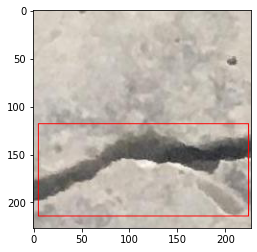

In [ ]:
path = np.random.choice(glob(os.path.join(FOLDER_PATH, 'dataset/train_img/*')), 1)[0]
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.imshow(r_image)

## Yolo pretrained COCO

In [ ]:
classes_path = os.path.join(FOLDER_PATH, 'model_data/aoi_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'ep036-loss10.231-val_loss10.506.h5'),
            classes_path=classes_path,
            anchors_path=anchors_path)

/content/drive/My Drive/keras_yolov3_bridge_detection/ep036-loss10.231-val_loss10.506.h5 model, anchors, and classes loaded.


/content/drive/My Drive/keras_yolov3_bridge_detection/testing_pictures/crack-wall-concrete-texture.jpg
(910, 607) (416, 416)
(416, 416, 3)
Found 1 boxes for img
concrete crack 0.27 (351, 0) (694, 607)
1.8006877709999571


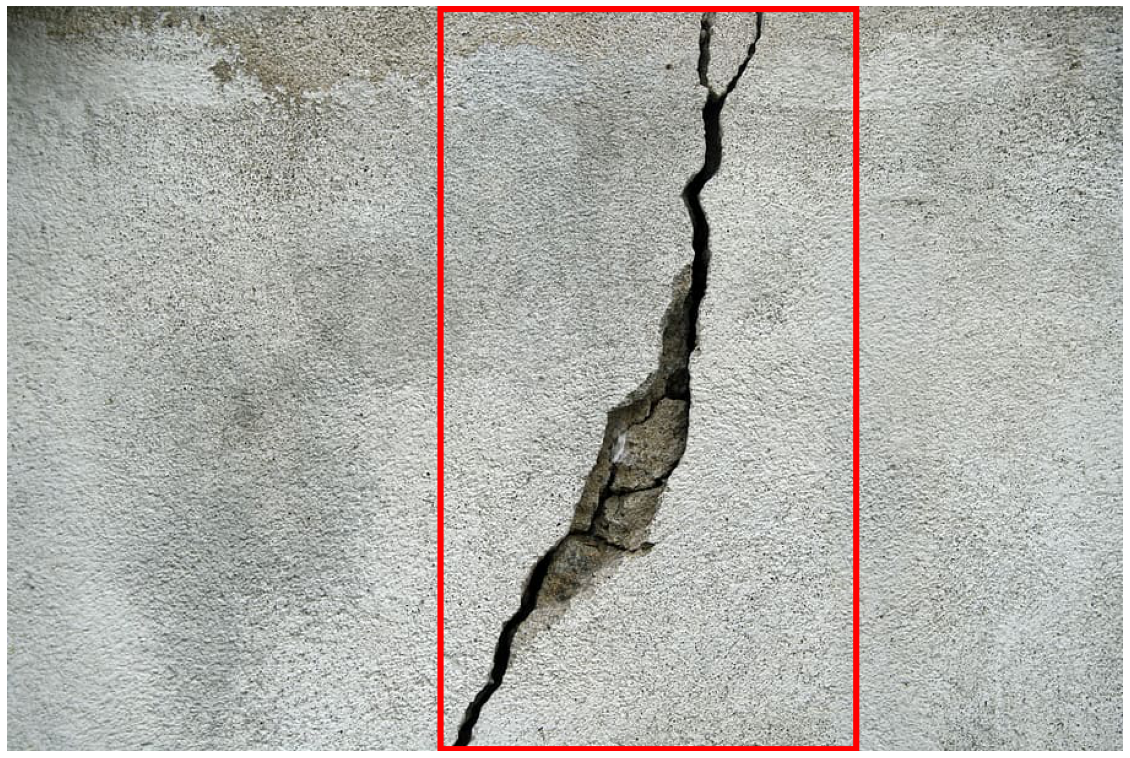

In [ ]:
path = os.path.join(FOLDER_PATH, 'testing_pictures/crack-wall-concrete-texture.jpg')
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(r_image)

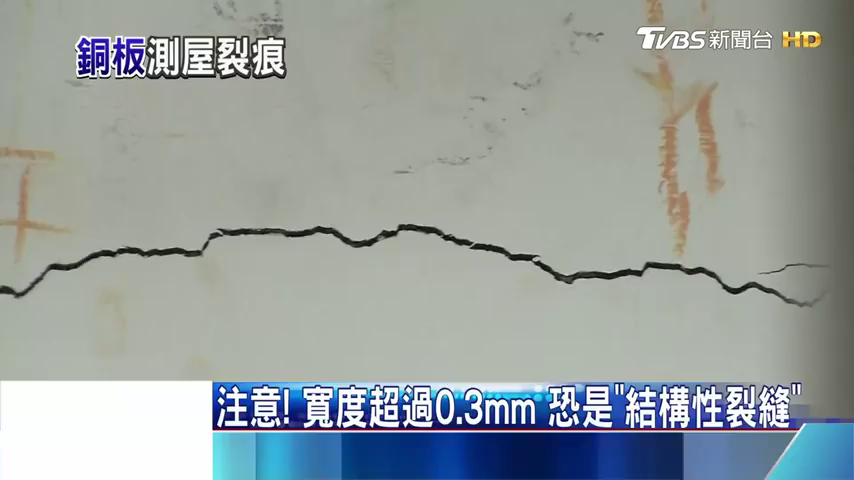

Frame number: 0


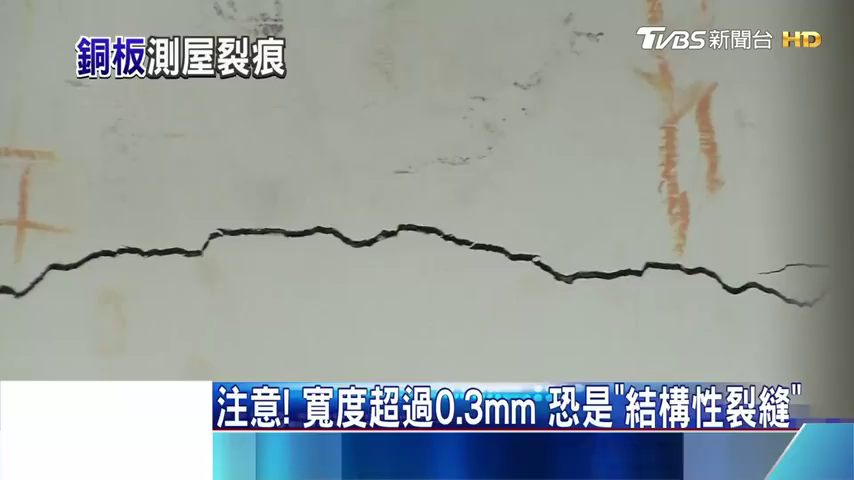

Frame number: 1


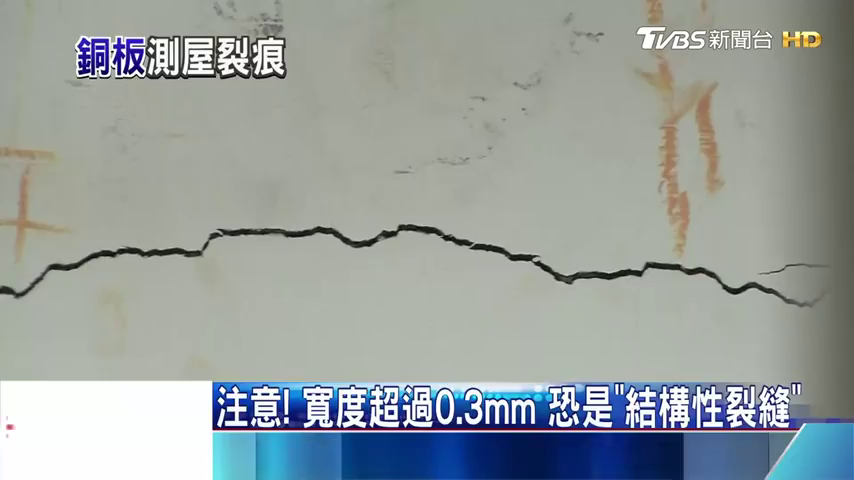

Frame number: 2


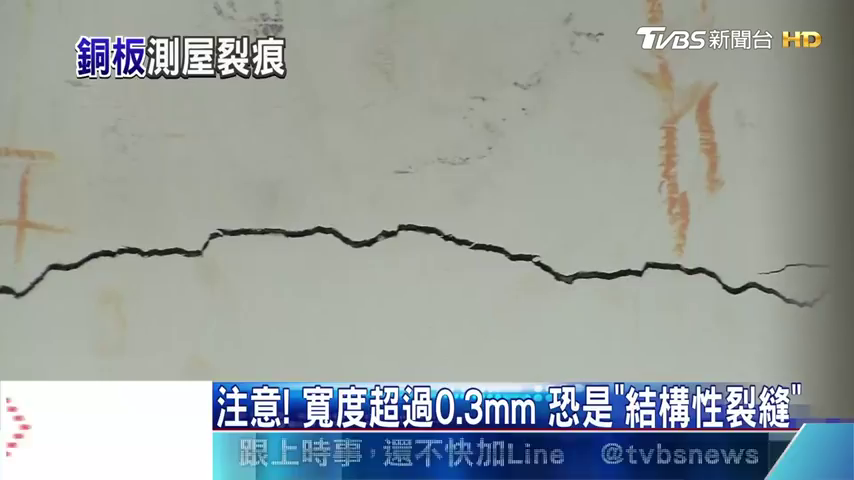

Frame number: 3


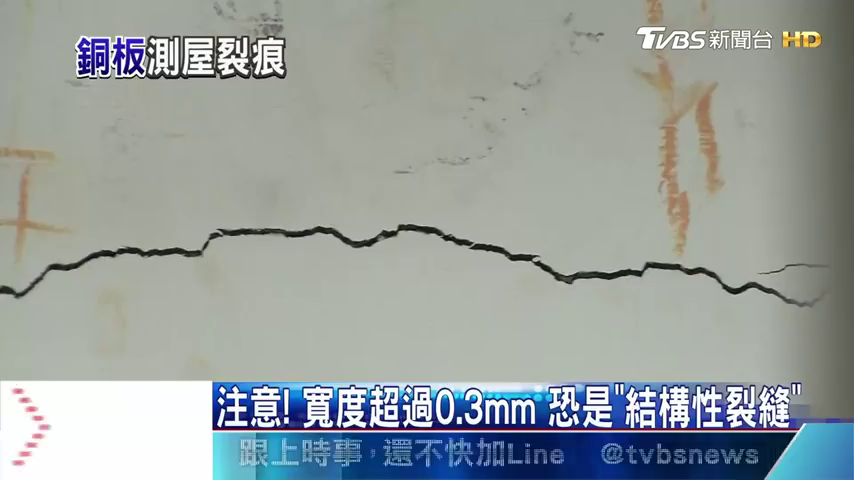

Frame number: 4


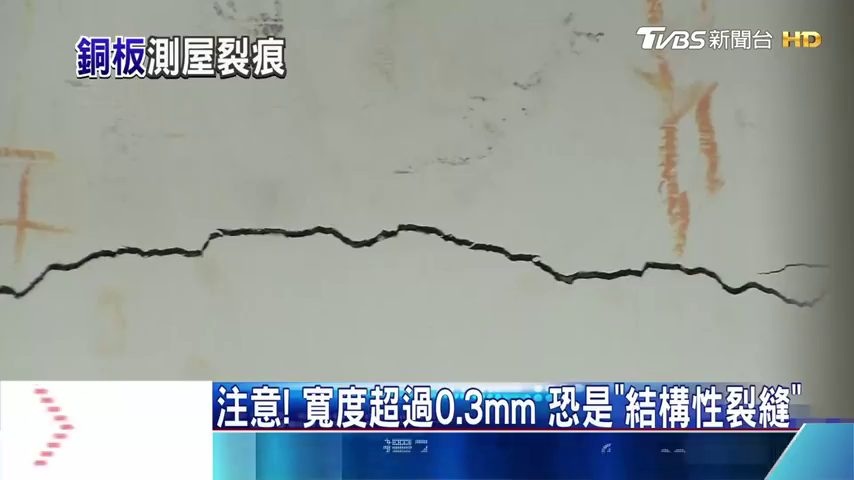

Frame number: 5


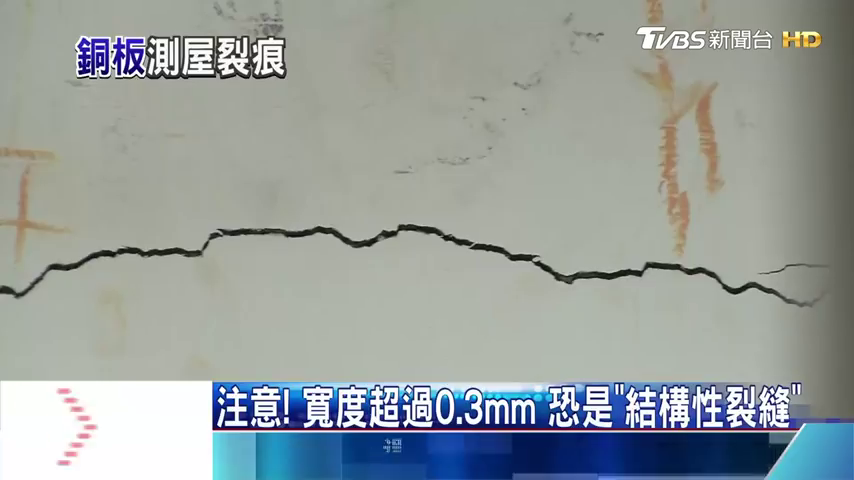

Frame number: 6


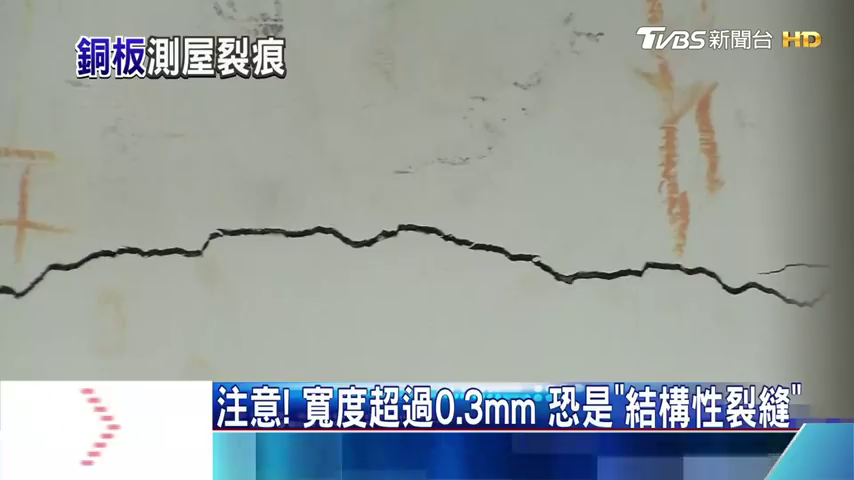

Frame number: 7


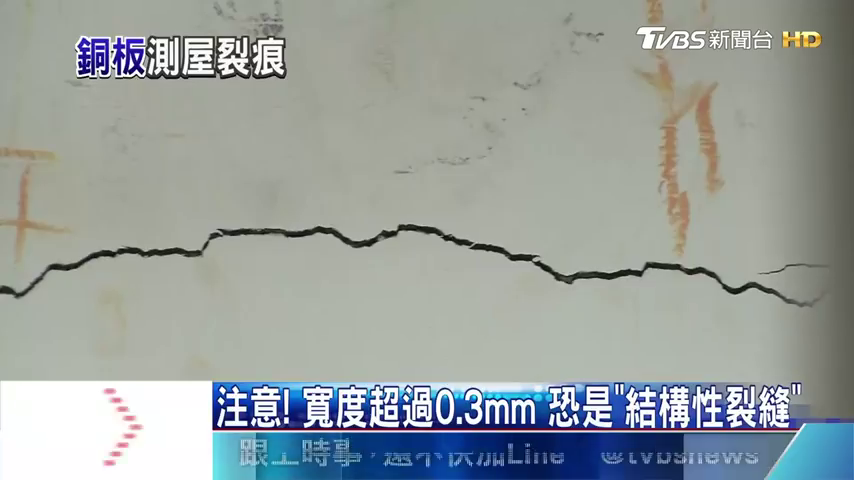

Frame number: 8


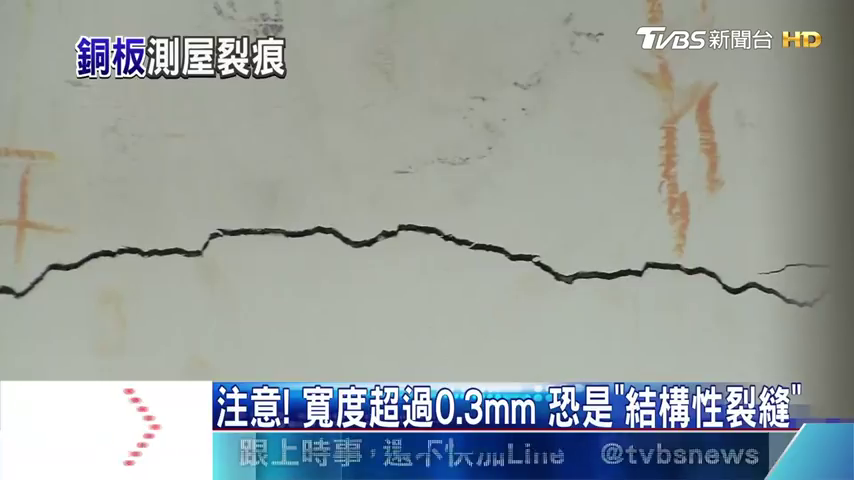

Frame number: 9


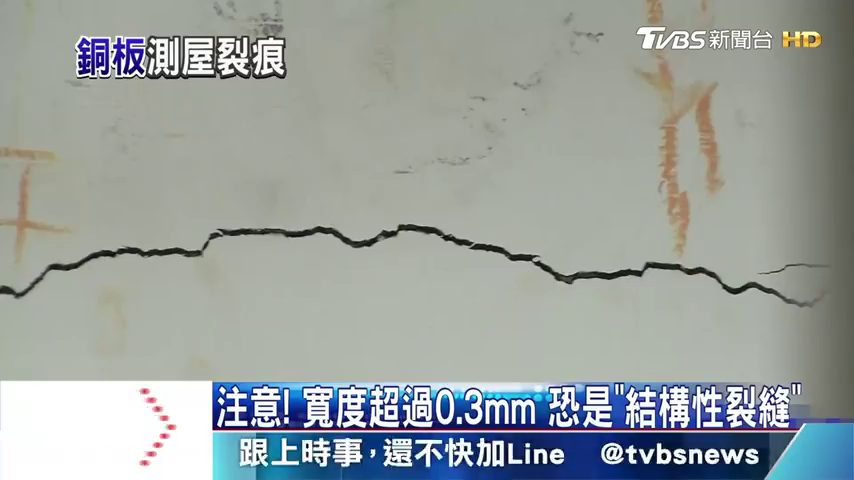

Frame number: 10


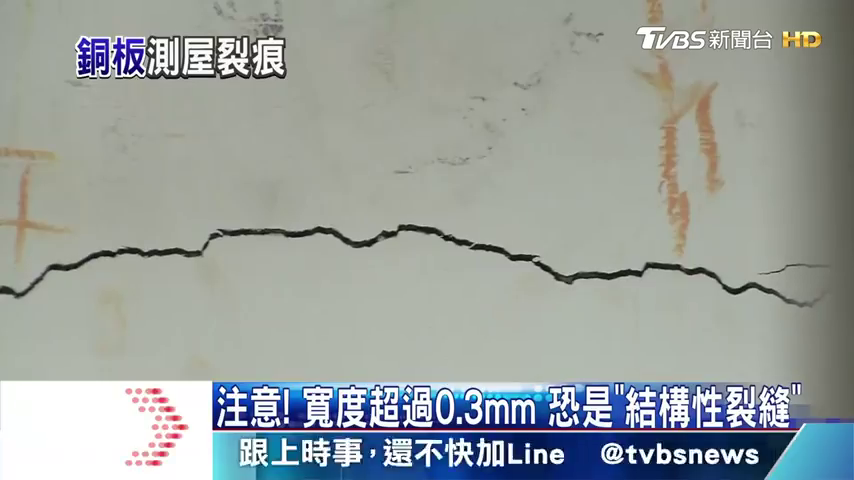

Frame number: 11


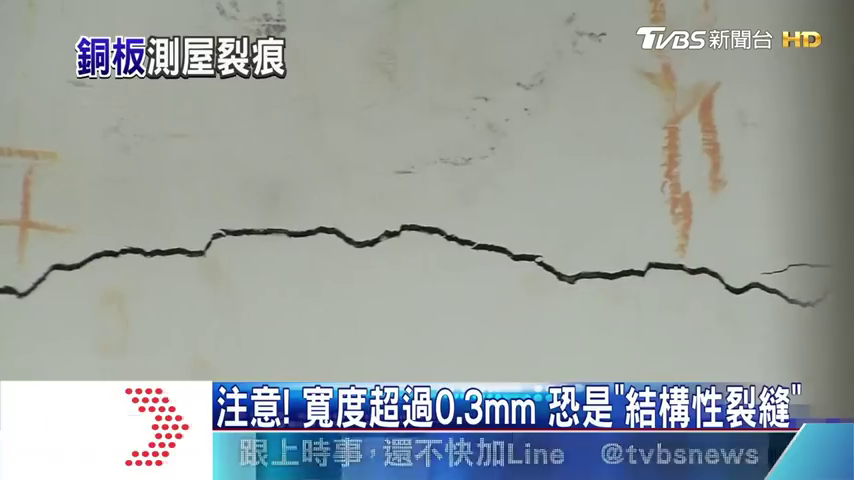

Frame number: 12


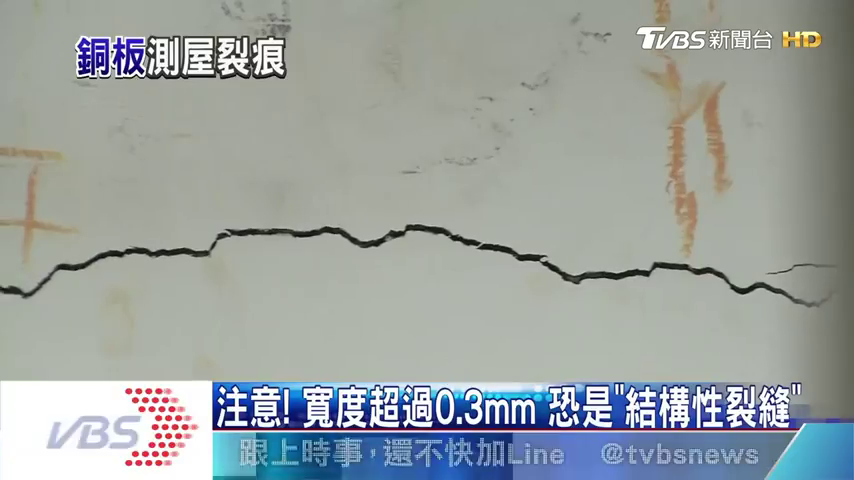

Frame number: 13


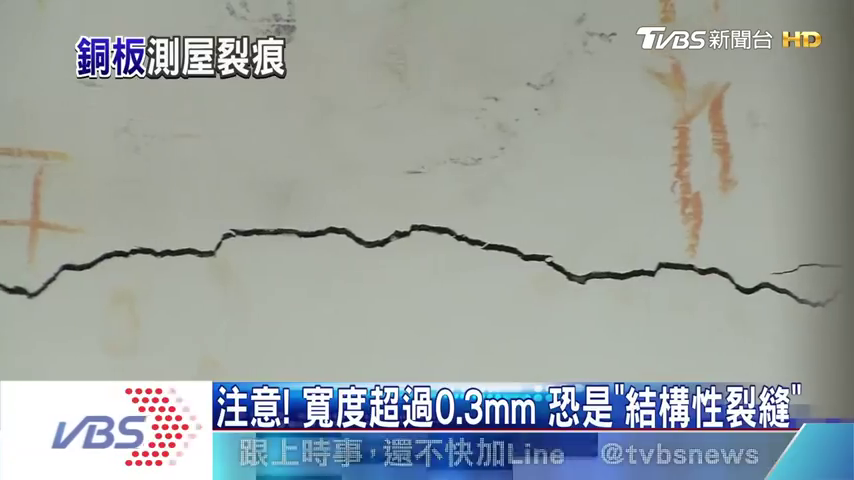

Frame number: 14


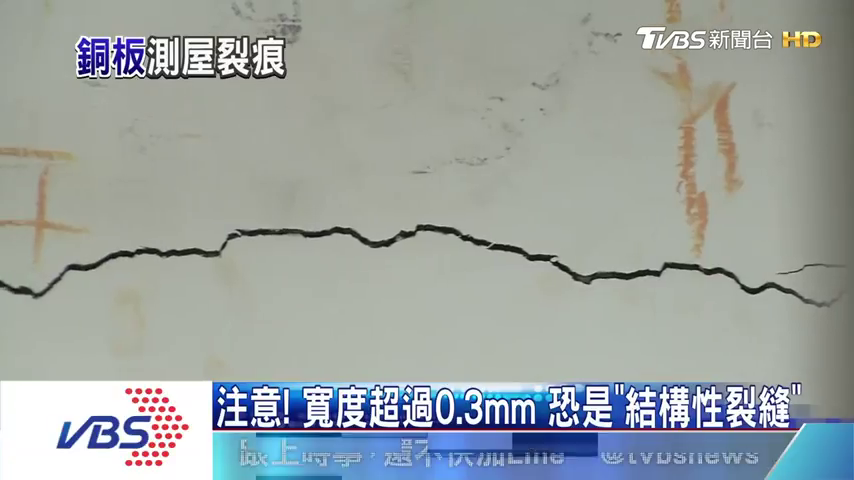

Frame number: 15


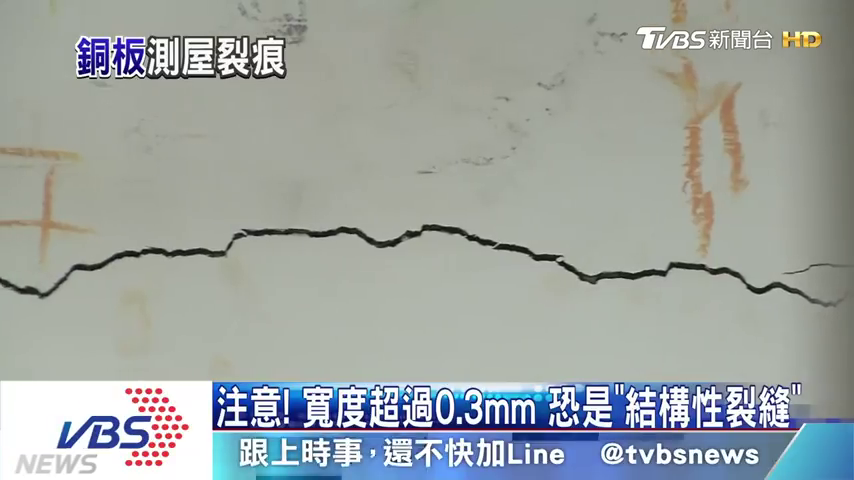

Frame number: 16


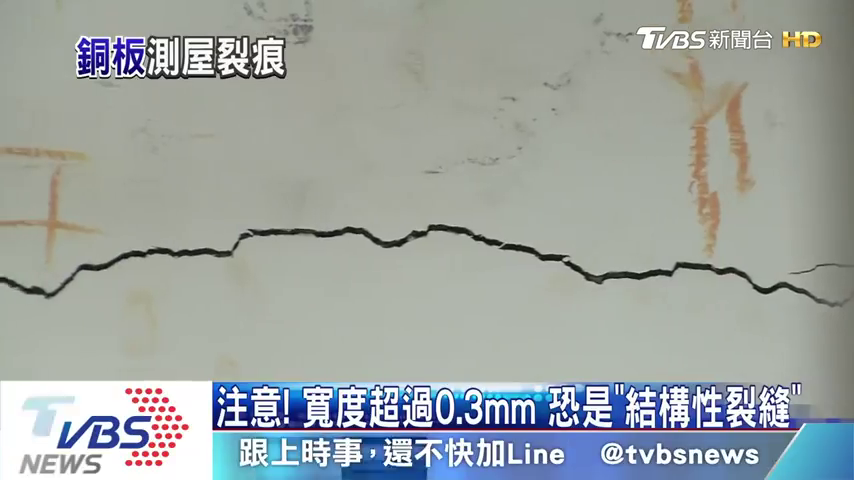

Frame number: 17


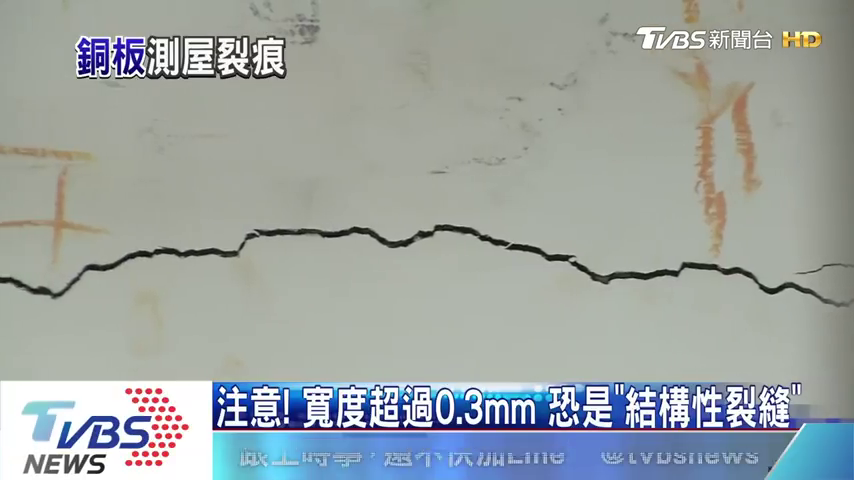

Frame number: 18


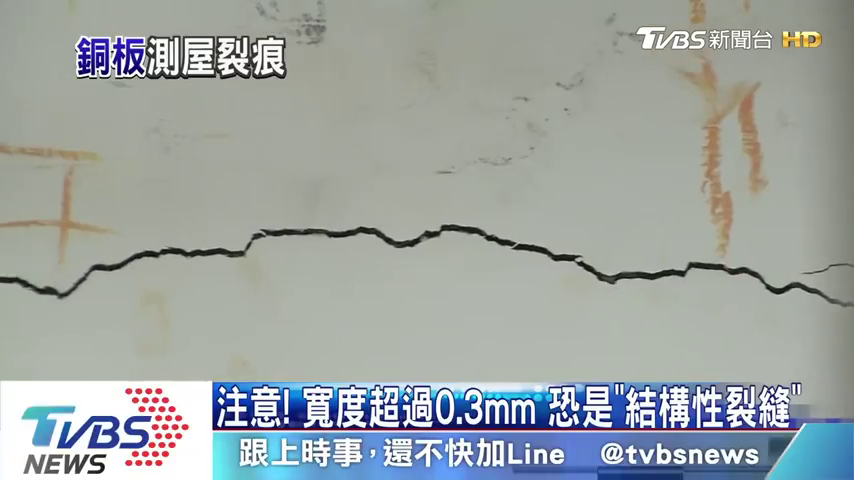

Frame number: 19


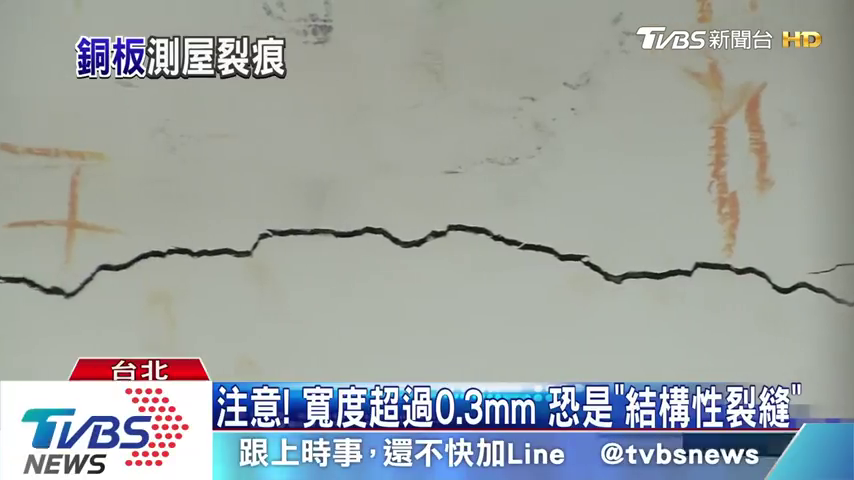

Frame number: 20


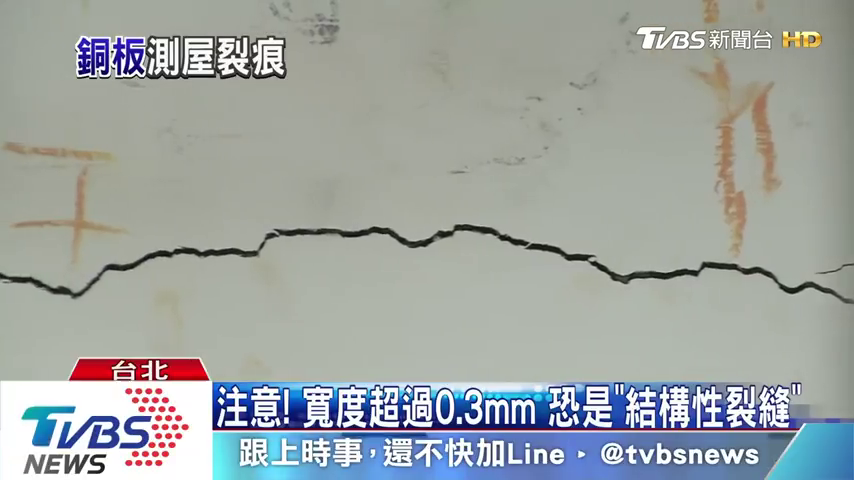

Frame number: 21


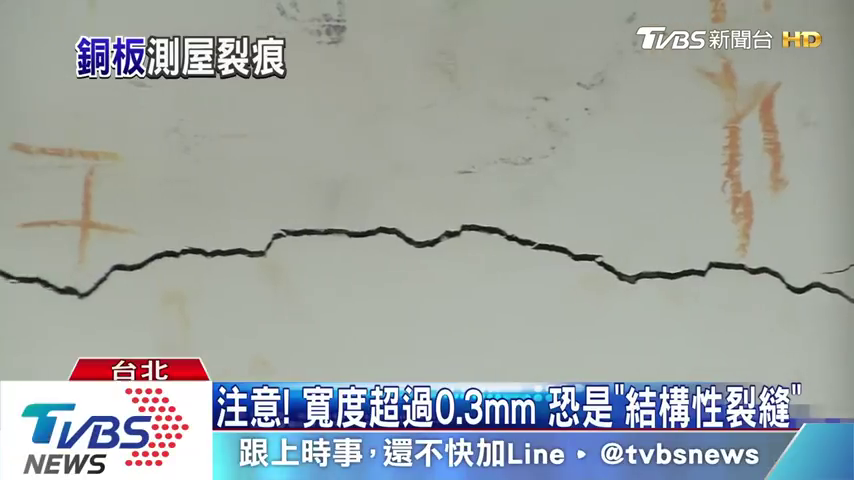

Frame number: 22


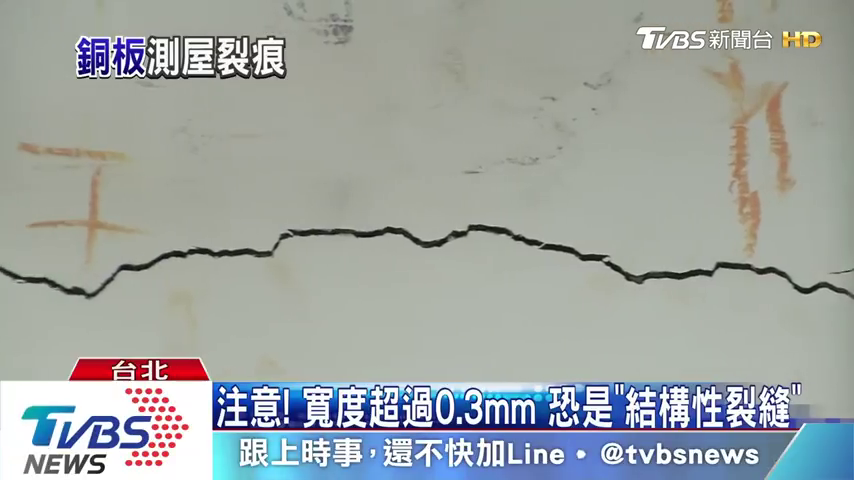

Frame number: 23


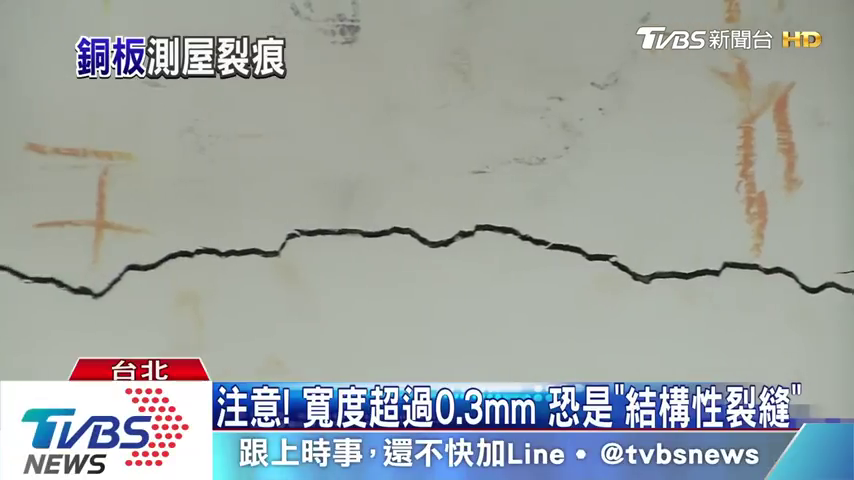

Frame number: 24


In [ ]:
import numpy as np
# import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture(r"/content/drive/My Drive/keras_yolov3_bridge_detection/testing_pictures/test_video.mp4")
counter = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    cv2_imshow(frame)

    print("Frame number: " + str(counter))
    counter = counter+1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()